In [1]:
#Here we import the packages that we may use.
from __future__ import division, print_function
import numpy as np
import pylab as pl

from pandas import Series, DataFrame
import pandas as pd

#We need to import the date time module for this excercise
import datetime
from datetime import datetime
import matplotlib.dates as mdates



In [2]:
#Here we enable jupyter notebooks to import the variables that ir in the system
import sys
import os

#Here we get the DFDATA environmental variable, and check its pointing to the data facility
os.getenv('DFDATA')

'/gws/open/NYCOpenData/nycopendata/data'

In [3]:
#Now, we will point to a specific dataset (Demographic Statistics By Zip Code) using the environmental variable
dataset=os.getenv('DFDATA')+"/sbnd-xujn/1414944572/sbnd-xujn"

#dataset is an address pointing to the dataset
df = pd.read_csv(dataset)

#We see the first rows of the dataframe
df.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,HWOID,HWONumber,BuildingID,BoroID,Boro,HouseNumber,StreetName,Zip,Block,Lot,...,IsAEP,IsCommercialDemolition,FEMAEventID,FEMAEvent,HWODescription,HWOApprovedAmount,SalesTax,AdminFee,ChargeAmount,DateTransferDoF
0,244,E000270,373691,3,BROOKLYN,1359,ST JOHNS PLACE,11213.0,1378,7501,...,NaN,NaN,NaN,NaN,demo 20 sqft.of ceiling. replace 20 sqft of ce...,218.58,18.03,32.79,269.40,04/19/2000 12:00:00 AM
1,246,E000273,312369,3,BROOKLYN,475,HICKS STREET,11231.0,321,27,...,NaN,NaN,NaN,NaN,demo hallwy wall remove broken riser.install n...,698.85,57.66,75.00,831.51,05/18/2000 12:00:00 AM
2,247,E000274,322226,3,BROOKLYN,511,LAFAYETTE AVENUE,11205.0,1783,93,...,NaN,NaN,NaN,NaN,"install (1) window guard, 2nd story p/h.",45.27,3.73,15.00,64.00,05/18/2000 12:00:00 AM
3,250,E000277,250417,3,BROOKLYN,531,EAST 22 STREET,11226.0,5208,46,...,NaN,NaN,NaN,NaN,l/r install window stop. kit.install window st...,110.59,9.12,16.59,136.30,05/18/2000 12:00:00 AM
4,254,E000284,292220,3,BROOKLYN,1337,FLATBUSH AVENUE,11226.0,5211,63,...,NaN,NaN,NaN,NaN,free stuck scuttle cover.,135.20,11.15,20.28,166.63,05/18/2000 12:00:00 AM


In [4]:
#We could drop the variables we do not want, with:
#df.drop(['X',..., 'Y'],axis=1, inplace=True) but in this case, as we only want two variables, we select only two of them with:

#df1 will be the reduced data set with only the columns mentioned:
df1 = df[[ 'DateTransferDoF',"ChargeAmount"]]

df1.head()


,DateTransferDoF,ChargeAmount
0,04/19/2000 12:00:00 AM,269.40
1,05/18/2000 12:00:00 AM,831.51
2,05/18/2000 12:00:00 AM,64.00
3,05/18/2000 12:00:00 AM,136.30
4,05/18/2000 12:00:00 AM,166.63


In [5]:
#What type of data is DateTransferDoF?:
np.dtype(df1.DateTransferDoF)


dtype('O')

In [8]:
#We need to change the type to date time:
df1["DateTransferDoF"] =  pd.to_datetime(df1["DateTransferDoF"])

df1.head()


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,DateTransferDoF,ChargeAmount
0,2000-04-19,269.40
1,2000-05-18,831.51
2,2000-05-18,64.00
3,2000-05-18,136.30
4,2000-05-18,166.63


In [9]:
#Now we have a datatime variable
np.dtype(df1.DateTransferDoF)

dtype('<M8[ns]')

Populating the interactive namespace from numpy and matplotlib


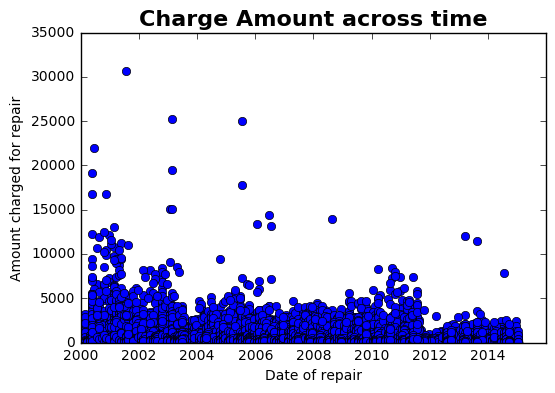

In [11]:
#This enables to render the notebook in github
%pylab inline

#We do a sactterplot, kind of, by using the plot function and forcing it to use dots
pl.plot('DateTransferDoF',"ChargeAmount","o", data=df1 )
pl.xlabel("Date of repair")
pl.ylabel("Amount charged for repair")
pl.title('Charge Amount across time',weight='bold',fontsize=16)
pl.xlim("01/01/2000","12/31/2015")
pl.ylim(0,35000)
pl.show()

#Note that the x and y limits had been reduced because of the presence of outliers

